# With ML, discover the players positions of the game FIFA 2017

In [220]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [221]:
# Read CSV files into DataFrames
df_train = pd.read_csv(r"C:\Users\wesle\codenation\mlearning-1\train.csv", header=0)
df_test = pd.read_csv(r"C:\Users\wesle\codenation\mlearning-1\test.csv", header=0)

In [222]:
# Take a look at the Data
df_train.head()

,ID,height_cm,weight_kg,eur_wage,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,...,skilled_dribbling_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,preferred_pos
0,6f5e21e1a125d8cd4302ee636b2dbfcde876bad8,191.0,87.0,18000.0,1,3,6,6,10,15,...,False,False,False,False,False,False,False,False,False,prefers_gk
1,3137856d4de4f35ecd437bfcb6f6555e36dabbc0,171.0,72.0,8000.0,2,3,54,32,45,69,...,False,False,False,False,False,False,False,False,False,prefers_cm
2,5e60935d579a888fb0230892921064657d17b850,190.0,88.0,2000.0,1,3,33,21,14,42,...,False,False,False,False,False,False,False,False,False,prefers_gk
3,083e73805f423abc02e65122d2dfcea880db92c0,194.0,96.0,20000.0,3,3,38,71,71,53,...,False,False,False,False,False,False,False,False,False,prefers_st
4,023215731d302e2a3a79f208438e9440637d0004,193.0,90.0,7000.0,2,2,47,30,77,47,...,False,False,False,False,False,False,False,False,False,prefers_cb


In [223]:
# Check if train and test datasets have the same columns
target = 'preferred_pos'
print('\nTrain and Test Datasets have the same columns?:',
      df_train.drop(target,axis=1).columns.tolist()==df_test.columns.tolist())
print('df_train.shape:',df_train.shape)
print('df_test.shape:',df_test.shape)


Train and Test Datasets have the same columns?: True
df_train.shape: (4829, 55)
df_test.shape: (4829, 54)


In [224]:
# Check Columns with constant values
dropcols_train = [c for c in df_train.columns if (df_train[c].nunique()==1) & (df_train[c].isnull().sum() == 0)]
dropcols_train

[]

There are no columns with constant values in it.

In [225]:
#Columns to be dropped
cols_to_drop = dropcols_train + ['ID']

In [226]:
# Store and Drops Id's from datasets, and Target from Train Dataset
IDs = 'ID'
y_target = df_train[target].values
train_id = df_train[IDs].values
test_id = df_test[IDs].values

In [227]:
#Merge Data before preprocessing:
df_merge = pd.concat([df_train.drop(target,axis=1),df_test],axis=0)
df_merge.drop(cols_to_drop,axis=1,inplace=True)

In [228]:
#Missing Data on Merge Dataset
total = df_merge.isnull().sum().sort_values(ascending=False)
percent = (df_merge.isnull().sum()/df_merge.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
aerial_threat_speciality,0,0.0
aggression,0,0.0
strength,0,0.0
stamina,0,0.0
jumping,0,0.0
shot_power,0,0.0
balance,0,0.0
reactions,0,0.0
agility,0,0.0
sprint_speed,0,0.0


There is no missing data!

### LabelEncoder Predictors

In [229]:
qualitative_features = [f for f in df_merge.columns 
                        if (df_merge[f].dtypes == object) | (df_merge[f].dtypes == bool)] #Lista de Features Qualitativas.
quantitative_features = [f for f in df_merge.dropna().columns 
                         if (df_merge[f].dtypes != object) & (df_merge[f].dtypes != bool)] #Lista de Features Qualitativas.

from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
d = defaultdict(LabelEncoder)
### Encoding the variable
fit = df_merge[qualitative_features].apply(lambda x: d[x.name].fit_transform(x))
df_merge[qualitative_features] = fit

### Restore datraframes df_train and df_test

In [230]:
df_train = df_merge[:len(df_train)]
df_train[target] = y_target.tolist()
df_test = df_merge[len(df_train):]

### Division between X_train,X_val,y_train,y_val

In [277]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

size_test = 0.3
df_train = shuffle(df_train) #shuffle data before division
train_target = df_train[target]
predictors = df_train.drop(target, axis=1)
X_train, X_val, y_train, y_val = train_test_split(predictors, 
                                                    train_target,
                                                    train_size=1-size_test, 
                                                    test_size=size_test, 
                                                    random_state=0)
X_test = df_test

In [278]:
y_val[:3]

3694    prefers_gk
4342    prefers_gk
618     prefers_cb
Name: preferred_pos, dtype: object

In [279]:
y_train[:3]

4653    prefers_gk
710     prefers_st
106     prefers_cb
Name: preferred_pos, dtype: object

### Decision Tree

In [280]:
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_val)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_val))

The accuracy of the Decision Tree is 0.7777777777777778


### Let's check the accuracy for various values of n for K-Nearest nerighbours

([<matplotlib.axis.XTick at 0x246003c6438>,
 <a list of 10 Text xticklabel objects>)

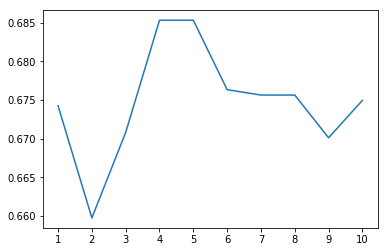

In [281]:
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
import matplotlib.pyplot as plt
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_val)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_val)))
plt.plot(a_index, a)
plt.xticks(x)

### Random Forest Classifier

Let's transform our target into binary vectors, this way RFClassifier can treat it to fit a ML model.

In [282]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()
y_binarized = binarizer.fit_transform(df_train[target])
print(y_binarized[:3])

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


In [283]:
y_binarized.shape

(4829, 15)

In [284]:
y_train_binarized = binarizer.fit_transform(y_train)
print(y_train_binarized[:3])

[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [285]:
y_train_binarized.shape

(3380, 15)

In [286]:
y_val_binarized = binarizer.fit_transform(y_val)
print(y_val_binarized[:3])

[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [287]:
y_val_binarized.shape

(1449, 15)

In [288]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train.values, y_train_binarized)
y_val_pred = clf.predict(X_val.values)

In [289]:
print('The accuracy of the RandomForestClassifier is',metrics.accuracy_score(y_val_pred,y_val_binarized))

The accuracy of the RandomForestClassifier is 0.7301587301587301


In [290]:
from sklearn.metrics import classification_report
print(classification_report(y_val_binarized, y_val_pred))

             precision    recall  f1-score   support

          0       1.00      0.02      0.04        54
          1       0.96      0.95      0.96       348
          2       1.00      0.03      0.06        67
          3       0.00      0.00      0.00         4
          4       0.86      0.51      0.64       121
          5       1.00      1.00      1.00       269
          6       0.96      0.73      0.83       100
          7       0.00      0.00      0.00        30
          8       0.00      0.00      0.00         6
          9       0.00      0.00      0.00         1
         10       0.92      0.52      0.67        90
         11       0.00      0.00      0.00        53
         12       0.00      0.00      0.00        14
         13       0.00      0.00      0.00         1
         14       0.95      0.94      0.95       291

avg / total       0.89      0.73      0.76      1449



In [291]:
rf_prediction = clf.predict(X_test.values)
rf_prediction[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [292]:
# Return result to string
rf_prediction = binarizer.inverse_transform(rf_prediction) 
rf_prediction[:3]

array(['prefers_cam', 'prefers_cm', 'prefers_gk'], dtype='<U11')

### Submission CSV File Creation

I will use the RandomForest model prediction as final model.

In [293]:
df_saida = pd.DataFrame(
        {'ID':list(test_id),
         'preferred_pos':list(rf_prediction)
                })

In [294]:
# Lets see our answer dataframe
df_saida[:5]

,ID,preferred_pos
0,d5286f4b535dcf7df5aeed0777cb61987840895f,prefers_cam
1,7bc1e32ee0ebbfab10f70378ad6c573bdfe41176,prefers_cm
2,7003552a70d3f826412e586188c2e69383939a4a,prefers_gk
3,5ea98302a9c7969336ffa578567e2aba0817c37b,prefers_cam
4,2c48f351d73be98ded530102ca549f80c81ce72f,prefers_cam


### Submit Solution

In [295]:
df_saida.to_csv(r'C:\Users\wesle\codenation\mlearning-1\answer.csv',index=False)

This solution scored 77% on LeaderBoard.